In [1]:
# LONGEST COMMON SUBSEQUENCE
def LCS(S1, S2):
    l1 = len(S1)
    l2 = len(S2)
    LCS_table = [[0 for x in range(l2+1)] for x in range(l1+1)]
    # this table stores the length of LCS for two strings of sizes i,j resp (i<=l1 and j<=l2)
    #
    for i in range(l1+1):
        for j in range(l2+1):
            if i == 0 or j == 0:
                LCS_table[i][j] = 0
            elif S1[i-1] == S2[j-1]:
                LCS_table[i][j] = LCS_table[i-1][j-1] + 1
            else:
                LCS_table[i][j] = max(LCS_table[i-1][j], LCS_table[i][j-1])
                
    LCS_size = LCS_table[l1][l2]
    strn_chars=[]
    strn=""
    
    i=l1
    j=l2
    # Backtracking to build the string(LCS) from the LCS_table
    while i > 0 and j > 0:

        if S1[i-1] == S2[j-1]:
            strn_chars.append(S1[i-1])
            i -= 1
            j -= 1
            LCS_size -= 1

        elif LCS_table[i-1][j] > LCS_table[i][j-1]:
            i -= 1
        else:
            j -= 1
    strn_chars.reverse()
    for chare in strn_chars:
        strn+=chare
    print("LCS: ",strn)
    print("Length of LCS: ",len(strn))


s1 = input("Enter first string: ")
s2 = input("Enter second string: ")
LCS(s1,s2)



Enter first string: Ramanathan
Enter second string: Ramanuja
LCS:  Ramana
Length of LCS:  6


In [3]:
# DIJKSTRA'S ALGORITHM
import heapq # using for a priority queue

class edge:
    def __init__(self,to,cost):
        self.to = to
        self.cost = cost
        
    
def dijkstra(graph, tot_nods, prim_nod): #prim_nod is the index of starting node
    vis=[] #Stores if we have visited a particular node
    dist=[] #Stored the shortest distance of a particular node form prim_nod
    prev=[] # Stores the index of previous node visited in the 'shortest path'
    for i in range(tot_nods):
        vis.append(False)
        dist.append(-1)
        prev.append(None)
    
    dist[prim_nod]=0 # Set the distance of source node to be 0
    
    arr=[]
    heapq.heapify(arr)
    heapq.heappush(arr,(0,prim_nod)) #Pushing the source node into the priority queue
    
    while len(arr) != 0:
        minVal,index = heapq.heappop(arr)
        
        vis[index] = True
        
        if dist[index] < minVal and dist[index]!=-1: continue 
            #The recorded shortest distance is already less than minVal, so we can skip procedure
            
        for edge in graph[index]:
            
            if vis[edge.to]: continue # edge[0] stores the index of node that is present in the adj_list
            # if node is already visited, we skip
            newDist = dist[index] + edge.cost #edge[1] stores the cost required from moving from old node to the node in adj_list
            
            if newDist < dist[edge.to] or dist[edge.to]==-1:
                dist[edge.to] = newDist
                prev[edge.to] = index 
                heapq.heappush(arr,(newDist,edge.to)) #Push this node into the priority queue
                
    return dist, prev

def shortest_path(graph, tot_nods, source_nod, destination_nod):
    dist, prev = dijkstra(graph, tot_nods, source_nod)
    path=[]
    if dist[destination_nod]==-1:
        return path,dist[destination_nod]
    it = destination_nod
    while(it!=None):
        path.append(it)
        it = prev[it]
    path.reverse() 
    return path,dist[destination_nod]
####################################################################################################
tot_nods = 5
graph = [[] for i in range(tot_nods)]

e1 = edge(1,4)
e2 = edge(2,5)
graph[0].append(e1)
graph[0].append(e2)

e3 = edge(3,10)
graph[1].append(e3)

e4 = edge(1,3)
e5 = edge(3,8)
graph[2].append(e4)
graph[2].append(e5)

e6 = edge(4,5)
graph[3].append(e6)

path,cost=(shortest_path(graph,tot_nods,0,4))
print("Shortest path between these 2 nodes: ",path)
print("Cost of this shortest path: ",cost)
    
# A cost of -1 indicates impossible

Shortest path between these 2 nodes:  [0, 2, 3, 4]
Cost of this shortest path:  18


- I am testing the above algorithm on this graph

- The costs from one vertex to other can be changed and tested

- The whole graph structure can be changed too, but you will have to input it manually using adjacent lists

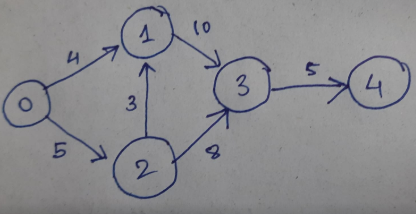


In [33]:
# PRIMS ALGORITHM
import heapq
class edge:
    def __init__(self,to,cost):
        self.to = to
        self.cost = cost
def insert_edges(graph,index,visit,arr):
    visit[index]=True
    for edge in graph[index]:
        if not visit[edge.to]:
            heapq.heappush(arr,(edge.cost,edge.to))
            
    
def prims(graph,tot_nodes):
    visit=[]
    mst_edges=[]
    for i in range(tot_nodes):
        visit.append(False)
        mst_edges.append(None)
    edgecount, mstCost = 0,0
    arr=[]
    heapq.heapify(arr)
    insert_edges(graph,0,visit,arr)
    while(len(arr)>0 and edgecount!=tot_nodes-1):
        cost,index = heapq.heappop(arr)
        
        
        if visit[index]:
            continue
        edgecount+=1
        mst_edges[edgecount]=(index,cost)
        mstCost+=cost
        insert_edges(graph,index,visit,arr)
    
    if edgecount!=tot_nodes-1:
        return (None,None)
    
    return (mstCost,mst_edges)

tot_nods = 6
graph = [[] for i in range(tot_nods)]

graph[0].append(edge(1,1))
graph[0].append(edge(4,6))
graph[1].append(edge(5,3))
graph[1].append(edge(2,8))
graph[3].append(edge(2,3))
graph[3].append(edge(1,5))
graph[4].append(edge(5,7))
graph[4].append(edge(3,2))


cost,edges = prims(graph,tot_nods)
print("The total cost of MST: ",cost)
print("The list of selected edges: (node_to, edge_cost)",edges[1:len(edges):1])
    

The total cost of MST:  15
The list of selected edges: (node_to, edge_cost) [(1, 1), (5, 3), (4, 6), (3, 2), (2, 3)]


- The test graph for Prim's algorithm

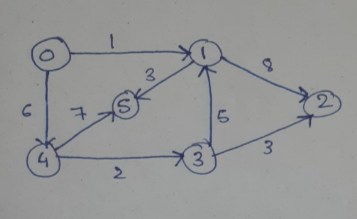

In [32]:
# KRUSKAL'S ALGORITHM
import heapq

class edge:
    def __init__(self,to,cost):
        self.to = to
        self.cost = cost
        
def is_cyclic_recursive(node, graph, vstd):
    if vstd[node]: #If this node is already visited, we return true, indicating presence of a cycle
        return True
    vstd[node] = True # We set the node to be visited while processing it
    Flag = False #Flag indicates presence of cycle
    for next_node in graph[node]:
        Flag = is_cyclic_recursive(next_node[1], graph, vstd) #Recursive call to this function
        if Flag:
            return True
    vstd[node] = False # We set the node to be unvisited after we're done with processing it
    return False

def isCyclic(graph,tot_nodes): 
    vstd = [False for i in range(tot_nodes)] #vstd array stores if each node is visited in current process
    Flag = False
    for node in range(tot_nodes): 
        vstd[node] = True
        for next_node in graph[node]:
            Flag = is_cyclic_recursive(next_node[1], graph, vstd)
            if Flag:
                return True
        vstd[node] = False
    return False

def Kruskal(graph,tot_nodes):
    selected_edges = [] #Stores the edges selected for MST
    arr=[] #The next few lines add all the edges of the graph to a priority queue
    visited = [False for i in range(tot_nodes)]
    heapq.heapify(arr)
    for node in range(tot_nodes):
        for edge in graph[node]:
            heapq.heappush(arr,(edge.cost,node,edge.to))
    
    i=0
    while(len(selected_edges)<(tot_nodes-1)):
        cost,src,dest = heapq.heappop(arr)
        selected_edges.append((cost,src,dest))
        curr_mst = [[] for j in range(tot_nodes)]
        for edge in selected_edges:
            curr_mst[edge[1]].append((edge[0],edge[2]))
        if isCyclic(curr_mst,tot_nodes) or (visited[src] and visited[dest]):
            selected_edges.pop(len(selected_edges)-1)
        else:
            visited[src] = True
            visited[dest] = True
        i+=1
    return selected_edges

           
tot_nodes=5
graph = [[] for i in range(tot_nodes)]
graph[0].append(edge(1,3))
graph[0].append(edge(2,5))
graph[1].append(edge(3,2))
graph[2].append(edge(3,3))
graph[1].append(edge(2,1))
graph[3].append(edge(4,4))

edges = Kruskal(graph, tot_nodes)
if len(edges)==tot_nodes-1:
    print("The edges of MST are (cost,source_node,destination_node):")
    print(edges)
else:
    print("MST impossible")

            
        

The edges of MST are (cost,source_node,destination_node):
[(1, 1, 2), (2, 1, 3), (3, 0, 1), (4, 3, 4)]


- The test graph is given below for Kruskal's algorithm

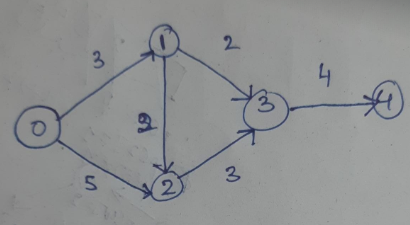